## Observations and Insights

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
#%matplotlib

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

merge_table = pd.merge(mouse_metadata, study_results)
merge_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [4]:
groupby = merge_table.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']})
groupby_df = pd.DataFrame(groupby)
groupby_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar plots

In [5]:
regimen_count = merge_table['Drug Regimen'].value_counts()
regimen_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

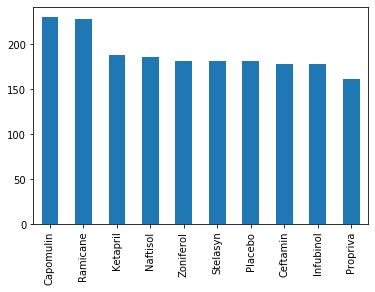

In [6]:
#pandas .plot- go back and put labels and stuff
regimen_count.plot(kind = "bar")
plt.show()

In [7]:
values = merge_table["Drug Regimen"].values
values

array(['Ramicane', 'Ramicane', 'Ramicane', ..., 'Naftisol', 'Naftisol',
       'Naftisol'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

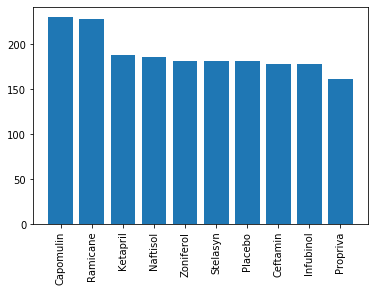

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#

plt.bar(regimen_count.index.values, regimen_count)
plt.xticks(rotation=90)

## Pie plots

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [10]:
gender_count = merge_table['Sex'].value_counts()
gender_count

Male      958
Female    935
Name: Sex, dtype: int64

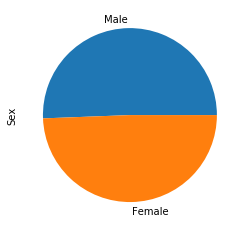

In [11]:
gender_count.plot(kind = "pie")
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


([<matplotlib.patches.Wedge at 0x1a1956e790>,
 [Text(-0.6908564105755949, -0.8559891471079557, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.37683076940486987, -0.46690317114979396, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

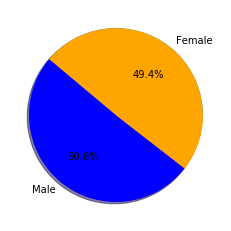

In [13]:
plt.pie(gender_count)
labels = ["Male", "Female"]
colors = ["blue", "orange"]
plt.pie(gender_count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
groupby_q = merge_table.groupby(["Mouse ID"]).last()
groupby_q.reset_index()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [15]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
    #Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine 
    #if there are any potential outliers across all four treatment regimens.
capomulin = groupby_q.loc[groupby_q["Drug Regimen"] == "Capomulin"]
cap_vol = capomulin["Tumor Volume (mm3)"]
cap_quartiles = cap_vol.quantile([.25, .5, .75])
cap_lowerq = cap_quartiles[.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {cap_vol.loc[(cap_vol < cap_lower_bound) | (cap_vol > cap_upper_bound)]}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [16]:
ramicane = groupby_q.loc[groupby_q["Drug Regimen"] == "Ramicane"]
ram_vol = ramicane["Tumor Volume (mm3)"]
ram_quartiles = ram_vol.quantile([.25, .5, .75])
ram_lowerq = ram_quartiles[.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-cap_lowerq
ram_lower_bound = ram_lowerq - (1.5*cap_iqr)
ram_upper_bound = ram_upperq + (1.5*cap_iqr)
print(f"Ramicane potential outliers: {ram_vol.loc[(ram_vol < ram_lower_bound) | (ram_vol > ram_upper_bound)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [17]:
Infubinol = groupby_q.loc[groupby_q["Drug Regimen"] == "Infubinol"]
inf_vol = Infubinol["Tumor Volume (mm3)"]
inf_quartiles = inf_vol.quantile([.25, .5, .75])
inf_lowerq = inf_quartiles[.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-cap_lowerq
inf_lower_bound = inf_lowerq - (1.5*cap_iqr)
inf_upper_bound = inf_upperq + (1.5*cap_iqr)
print(f"Infubinol potential outliers: {inf_vol.loc[(inf_vol < inf_lower_bound) | (inf_vol > inf_upper_bound)]}")

Infubinol potential outliers: Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [18]:
Ceftamin = groupby_q.loc[groupby_q["Drug Regimen"] == "Ceftamin"]             
ceft_vol = Ceftamin["Tumor Volume (mm3)"]
ceft_quartiles = ceft_vol.quantile([.25, .5, .75])
ceft_lowerq = ceft_quartiles[.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-cap_lowerq
ceft_lower_bound = ceft_lowerq - (1.5*cap_iqr)
ceft_upper_bound = ceft_upperq + (1.5*cap_iqr)
print(f"Ceftamin potential outliers: {ceft_vol.loc[(ceft_vol < ceft_lower_bound) | (ceft_vol > ceft_upper_bound)]}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


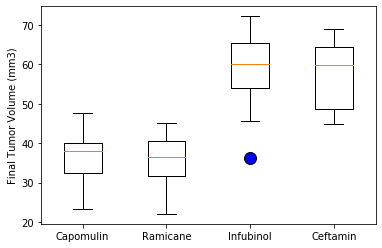

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Building the boxplots
design = dict(markerfacecolor='blue', markersize=12)
plt.boxplot([cap_vol, ram_vol, inf_vol, ceft_vol],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=design)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()



## Line and scatter plots

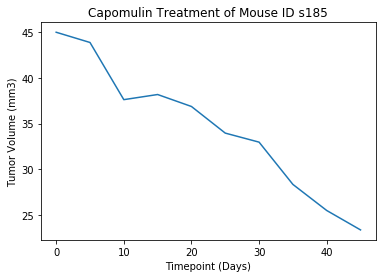

In [20]:
# * Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
capo2 = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin"]
capo2 = capo2.reset_index()
s185 = capo2.loc[capo2["Mouse ID"] == "s185"]
plt.plot(s185["Timepoint"],s185["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse ID s185")
plt.show()

In [21]:

capo2

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...,...
225,440,i557,Capomulin,Female,1,24,45,47.685963,1
226,1452,r157,Capomulin,Male,22,25,0,45.000000,0
227,1453,r157,Capomulin,Male,22,25,5,45.597064,0
228,1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

average_vol = capo2.groupby(["Tumor Volume (mm3)"]).mean()
average_vol = average_vol.reset_index()
average_vol

,Tumor Volume (mm3),index,Age_months,Weight (g),Timepoint,Metastatic Sites
0,23.343598,19.0,3.0,17.0,45.0,1.0
1,25.472143,18.0,3.0,17.0,40.0,1.0
2,28.167397,28.0,16.0,15.0,40.0,0.0
3,28.328531,17.0,3.0,17.0,35.0,1.0
4,28.430964,39.0,22.0,17.0,45.0,1.0
...,...,...,...,...,...,...
201,47.373423,384.0,12.0,25.0,15.0,0.0
202,47.488599,374.0,17.0,21.0,15.0,1.0
203,47.685963,440.0,1.0,24.0,45.0,1.0
204,48.070452,375.0,17.0,21.0,20.0,2.0


In [23]:
capo_vol = average_vol["Tumor Volume (mm3)"]
capo_weight = average_vol["Weight (g)"]
capo_time = average_vol["Timepoint"]

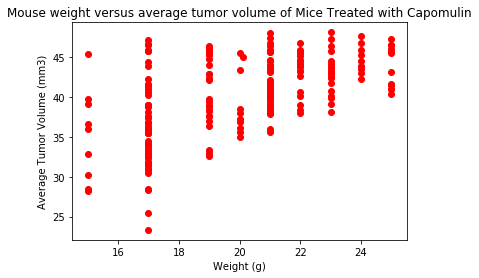

In [30]:
plt.scatter(capo_weight, capo_vol, marker="o", color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse weight versus average tumor volume of Mice Treated with Capomulin")
plt.show()

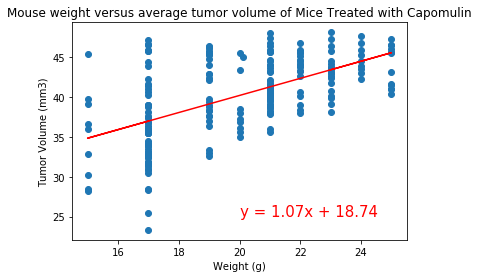

In [33]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average 
#tumor volume for the Capomulin regimen

# Add the linear regression equation and line to plot
x_values = capo_weight
y_values = capo_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse weight versus average tumor volume of Mice Treated with Capomulin")
plt.show()